[https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

[stack overflow source of this](https://stackoverflow.com/questions/53356312/2-degree-multi-variable-curve-fit)


fitted: [0.99945939 1.99963972 3.00007244 4.00039408 4.99999676]


<ipython-input-1-4fdcaa9824a2>:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X1, X2, Z_noise)
<ipython-input-1-4fdcaa9824a2>:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X1, X2, Z_fit)


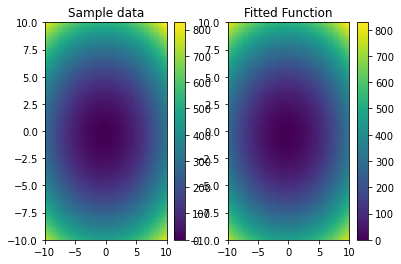

In [1]:
# Source - https://stackoverflow.com/a

# Posted by user8408080
# Retrieved 2026-01-09, License - CC BY-SA 4.0

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

def f(x, a1, a2, a3, a4, a5):
    return a1+a2*x[0]+a3*x[0]**2+a4*x[1]+a5*x[1]**2

limits = [-10, 10, -10, 10]  # [x1_min, x1_max, x2_min, x2_max]
side_x = np.linspace(limits[0], limits[1], 100)
side_y = np.linspace(limits[2], limits[3], 100)
X1, X2 = np.meshgrid(side_x, side_y)
size = X1.shape
X1_1d = X1.reshape((1, np.prod(size)))
X2_1d = X2.reshape((1, np.prod(size)))


xdata = np.vstack((X1_1d, X2_1d))

#Here I create some sample data
original = (1,2,3,4,5)
z = f(xdata, *original)
Z = z.reshape(size)
z_noise = z + .2*np.random.randn(len(z))
Z_noise = z_noise.reshape(size)

#For z_noise you have to plug in your data here
popt, pcov = curve_fit(f, xdata, z_noise)
print("fitted: {}".format(popt))
z_fit = f(xdata, *popt)
Z_fit = z_fit.reshape(size)

#Plotting
plt.subplot(1, 2, 1)
plt.title("Sample data")
plt.pcolormesh(X1, X2, Z_noise)
plt.axis(limits)
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title("Fitted Function")
plt.pcolormesh(X1, X2, Z_fit)
plt.axis(limits)
plt.colorbar()

plt.show()


In [14]:
popt

array([0.99945939, 1.99963972, 3.00007244, 4.00039408, 4.99999676])

100